# Data Analysis
**Reference:** Large-scale citizen science provides high-resolution nitrogen dioxide values and health impacts while enhancing community knowledge and collective action

<p style="text-align:right;">
    <b>Julian Vicens</b><br>
    <a href="https://jvicens.github.io">jvicens.github.io</a><br>
    v<b>1.0</b></p>

## Contents

This notebook provide the data analysis of the research paper mentioned above, it includes:

- [Data](#data)
- [Figure 3](#f3) (a) Passive samplers (averaged triplicate Palmes’ diffusion tubes) linear regression (solid line) with respect to automatic monitoring stations. (b) Annualized NO2 concentration levels comparison between the seven automatic monitoring stations and the average of xAire samplers when divided into the corresponding districts.
- [Figure 4](#f4) (a) Distribution of sampling sites with respect to their NO2 outdoor concentration levels. (b) Disaggregated traffic (red) and background (blue) distributions of sampling sites as a function of their NO2 concentration levels. Vertical dashed lines correspond to mean values of traffic (red) and background (blue) samplers. (c) Disaggregated traffic (red) and background (blue) NO2 concentration levels for every district including median (white line), interquartile (between 25% and 75%, boxes) and 95% confidence intervals (bars).
- [Figure 5](#f5) (a) Distributions of population and distribution of samplers, per unit of census tract. (b) Scatter plot between NO2 concentration levels and population in each census tract.
- [Table S1](#ts1): General statistics of the NO2 concentration levels of the xAire project with consistent rounding grounded on sampler’s precision and accuracy.
- [Table S2](#ts2): Statistics of the NO2 concentration levels of the xAire project in terms of the district with consistent rounding grounded on sampler’s precision and accuracy.
- [Table S3](#ts3): Statistics of the NO2 concentration levels of the xAire project in terms of the district and in terms of the type of location (background and traffic) grounded on sampler’s precision and accuracy.
- [Table S4](#ts4): Comparison between population and income spatial distributions per census tract. In each case, the Barcelona data is provided to evaluate the representativeness of the xAire citizen science site selection.
- [Figure S1](#fs1): $(a)$ Distributions of income and distribution of samplers (blue, n=671, per unit of census tract. $(b)$ Scatter plot between NO2 concentration levels and income average in each census tract.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import helper
from scipy import stats

<a id='data'></a>

### Data

**xAire** engaged 18 primary public schools evenly distributed among the 10 districts of the city, the schools organised mixed groups of 4-5 people with parents and children and autonomously placed up to 800 Palmes passive diffusion tube NO2 samplers following identical protocol between February 16th 2018 and March 15th 2018, four weeks, and resulting in 725 valid data points (671 outdoor, 31 outdoor playground, and 23 indoor school). Data collected in the experiment **xAire**.

In [2]:
df_xAire = pd.read_csv('data/xaire_clean.csv')

#### Official levels

Agència de Salut Pública de Barcelona. 2018. Avaluació de la Qualitat de l’Aire a la Ciutat de Barcelona. Informe 2017. <br>
https://www.aspb.cat/wp-content/uploads/2018/07/AVALUACIO_QUALITAT_AIRE_BARCELONA_2017-1.pdf

In [3]:
df_official = pd.read_csv('data/official_levels_2017.csv')

#### References stations and tubes error

Passive samplers may under or over estimate NO2 concentrations, resulting in a relatively moderate uncertainty. For this reason, during the measurement campaign, diffusion tubes were exposed in triplicate at 8 reference automatic official monitoring stations in the study area. This is the data that compares official stations and tubes measures.


In [4]:
df_refs = pd.read_csv('data/stations_vs_tubes.csv')

#### Income and population data

Income (2017)

https://opendata-ajuntament.barcelona.cat/data/ca/dataset/renda-tributaria-per-persona-atlas-distribucio/resource/d6bb4f5e-d719-447d-b6e8-5e3be2f710f2


Population (Jan. 1st, 2018)

https://www.bcn.cat/estadistica/catala/dades/tpob/pad/padro/a2018/llocna/llocna11.htm

In [5]:
df_income_bcn = pd.read_csv('data/renta_2017.csv')
df_population_bcn = pd.read_csv("data/cens_2018.csv")

<a id='f3'></a>

### Figure 3

$(a)$ Passive samplers (averaged triplicate Palmes’ diffusion tubes) linear regression (solid line) with respect to automatic monitoring stations. Dashed lines delimit 10% error tolerance, all samplers are within this uncertainty tolerance. 

<Figure size 432x288 with 0 Axes>

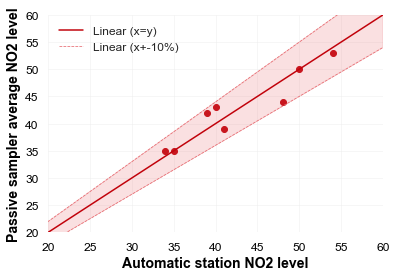

In [6]:
x = [0, 10, 20, 30, 40, 50, 60]
y = [0, 10, 20, 30, 40, 50, 60]

X = df_refs['automatic mean'].values.reshape(-1, 1)
Y = df_refs['tube mean'].values.reshape(-1, 1)

helper.plot_samplers(X, Y, x, y, 'Figure3a')

$(b)$ Annualized NO2 concentration levels comparison between the seven automatic monitoring stations and the average of xAire samplers when divided into the corresponding districts. Sarrià and Gràcia districts are assigned to the same automatic monitoring station. There are 2 traffic automatic monitoring stations (Sarrià/Sant Gervasi or Gràcia and Eixample) and 5 background automatic monitoring stations (Horta Guinardó, Les Corts, Sants / Montjuïc, Ciutat Vella, Sant Martí). 

<Figure size 432x288 with 0 Axes>

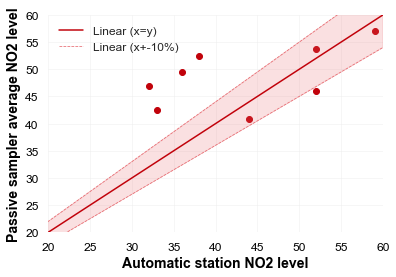

In [7]:
x = [0, 10, 20, 30, 40, 50, 60]
y = [0, 10, 20, 30, 40, 50, 60]

df_xAire_tmp = df_xAire[(df_xAire['tipus']=='tràfic') | (df_xAire['tipus']=='fons')]

df_official.index = df_official['district']
df_join = df_official.join(df_xAire_tmp.groupby(['district']).mean(), lsuffix='_caller', rsuffix='_other')[['no2', 'no2_2017']]
df_join.rename(columns = {'no2': 'no2_auto', 'no2_2017': 'no2_xAire'}, inplace=True)

X = df_join['no2_auto'].values.reshape(-1, 1)  
Y = df_join['no2_xAire'].values.reshape(-1, 1) 

helper.plot_samplers(X, Y, x, y, 'Figure3b')

<a id='f4'></a>

### Figure 4

$(a)$ Distribution of sampling sites with respect to their NO2 outdoor concentration levels. 

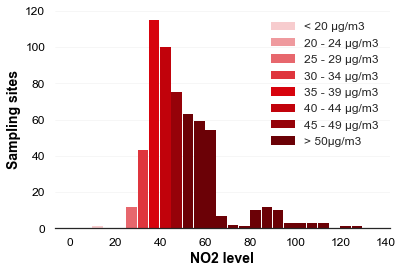

In [8]:
name = 'outdoor'
df_xAire_tmp = df_xAire[(df_xAire['tipus']=='tràfic') | (df_xAire['tipus']=='fons')]

#name = 'traffic'
#df_xAire_tmp = df_xAire[(df_xAire['tipus']=='tràfic')]

#name = 'background'
#df_xAire_tmp = df_xAire[(df_xAire['tipus']=='fons')]

#name = 'playground'
#df_xAire_tmp = df_xAire[(df_xAire['tipus']=='pati')]

#name = 'indoor'
#df_xAire_tmp = df_xAire[(df_xAire['tipus']=='aula')]

helper.plot_NO2(df_xAire_tmp)

$(b)$ Disaggregated traffic (red) and background (blue) distributions of sampling sites as a function of their NO2 concentration levels. Vertical dashed lines correspond to mean values of traffic (red) and background (blue) samplers. 

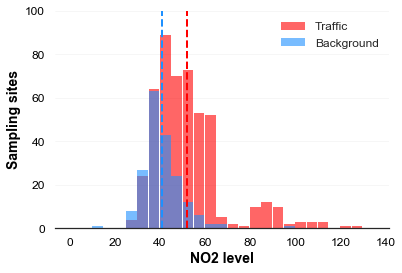

In [9]:
helper.plot_NO2_by_position(df_xAire_tmp)

$(c)$ Disaggregated traffic (red) and background (blue) NO2 concentration levels for every district including median (white line), interquartile (between 25% and 75%, boxes) and 95% confidence intervals (bars).

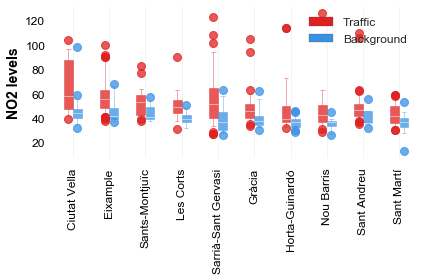

In [10]:
helper.plot_NO2_by_district(df_xAire_tmp)

<a id='f5'></a>

### Figure 5

$(a)$ Distributions of population (red, n=1,068) and distribution of samplers (blue, n=671), per unit of census tract.

<Figure size 432x288 with 0 Axes>

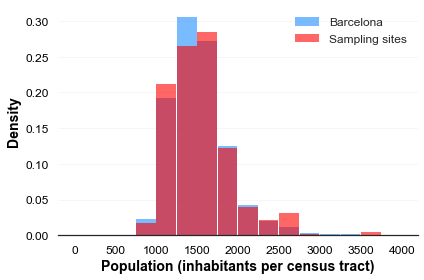

In [11]:
df_xAire_tmp = df_xAire[(df_xAire['tipus']=='tràfic') | (df_xAire['tipus']=='fons')]

bcn_population_plot = sns.distplot(df_population_bcn['Total'], color="red", label="Barcelona", bins=range(0,4250,250))
bcn_population = [h.get_height() for h in bcn_population_plot.patches]
bcn_population_norm = helper.normalization([h.get_height() for h in bcn_population_plot.patches])

# population density xaire: plot, counts, norm
plt.clf()
xaire_population_plot = sns.distplot(df_xAire_tmp["poblacio"], color="dodgerblue", label="xAire", bins=range(0,4250,250))
xaire_population = [h.get_height() for h in xaire_population_plot.patches]
xaire_population_norm = helper.normalization([h.get_height() for h in xaire_population_plot.patches])

helper.plot_population([bcn_population_norm, xaire_population_norm])


#### Kolmogorov-Smirnov

In [12]:
helper.KS_test(df_xAire_tmp["poblacio"], df_population_bcn['Total'], alpha=0.05)

stats: 0.04653878999983255
p: 0.3212981594776614
Null hypothesis: the independent samples are drawn from the same continuous distribution


$(b)$ Scatter plot between NO2 concentration levels and population in each census tract (Pearson's r=0.08, p-value=0.035).

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

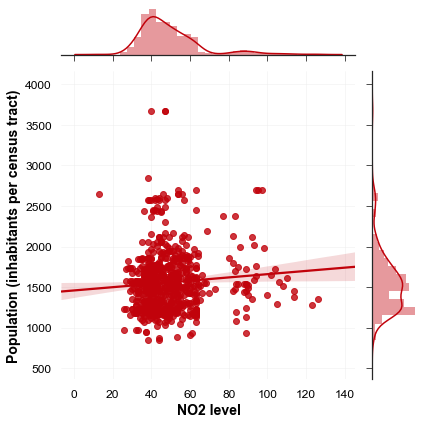

In [13]:
df_xAire_tmp = df_xAire[(df_xAire['tipus']=='tràfic') | (df_xAire['tipus']=='fons')]
helper.plot_population_corr(df_xAire_tmp)


#### Peason

In [14]:
helper.Pearson_corr(df_xAire_tmp['no2_2017'], df_xAire_tmp['poblacio'])

stats: 0.08112094972510256
p: 0.03565189096705036
Reject Null hypothesis: there is a statistically significant correlation


<a id='ts1'></a>

### Table S1

General statistics of the NO2 concentration levels of the xAire project with consistent rounding grounded on sampler’s precision and accuracy.

In [15]:
datasets = []
names = []

names.append('all')
datasets.append(df_xAire)
names.append('outdoor')
datasets.append(df_xAire[(df_xAire['tipus']=='tràfic') | (df_xAire['tipus']=='fons')])
names.append('traffic')
datasets.append(df_xAire[(df_xAire['tipus']=='tràfic')])
names.append('background')
datasets.append(df_xAire[(df_xAire['tipus']=='fons')])
names.append('playground')
datasets.append(df_xAire[(df_xAire['tipus']=='pati')])
names.append('indoor')
datasets.append(df_xAire[(df_xAire['tipus']=='aula')])

statistics = []
for index, d in enumerate(datasets):
    statistics.append(helper.get_stats(d['no2_2017']))
    
df = pd.DataFrame(statistics, index=names)
df

,n,Median,Mean,SD,s.e.m,5%,25%,75%,95%,Kurtosis,Skewness
all,725,44.0,47.88,15.63,0.58,30.0,38.0,54.0,84.0,4.17,1.72
outdoor,671,45.0,48.94,15.47,0.60,32.0,39.0,55.0,85.5,4.30,1.82
traffic,482,49.0,52.17,16.28,0.74,34.0,42.0,58.0,89.0,3.34,1.68
background,189,39.0,40.70,8.93,0.65,30.0,36.0,44.0,56.0,9.01,1.81
playground,31,38.0,37.16,6.54,1.17,27.5,33.5,39.5,48.5,0.37,0.18
indoor,23,28.0,31.26,14.35,2.99,18.0,23.5,35.5,51.0,7.97,2.43


<a id='ts2'></a>

### Table S2

Statistics of the NO2 concentration levels of the xAire project in terms of the district with consistent rounding grounded on sampler’s precision and accuracy.

In [16]:
df_xAire_tmp = df_xAire[(df_xAire['tipus']=='tràfic') | (df_xAire['tipus']=='fons')]

df_xAire_tmp[['no2_2017', 'district']].groupby(['district']).agg([np.mean,np.median, np.std, stats.sem,
                                                            lambda x: np.percentile(x, q=5), 
                                                            lambda x: np.percentile(x, q=25),
                                                            lambda x: np.percentile(x, q=75),
                                                            lambda x: np.percentile(x, q=95),
                                                            stats.kurtosis, stats.skew,'count']).rename(columns={'mean': 'mean', 'median': 'median', 
                                                                                                     'sem': 'sem', 'std': 'std',
                                                                                                     '<lambda_0>': '5%',
                                                                                                     '<lambda_1>': '25%',
                                                                                                     '<lambda_2>': '75%',
                                                                                                     '<lambda_3>': '95%', 
                                                                                                     'kurt': 'kurt', 'skew': 'skew',
                                                                                                     'count': 'n'}).round(2)


no2_2017                                                 \
                        mean median    std   sem     5%    25%   75%    95%   
district                                                                      
Ciutat Vella           52.45   46.0  17.88  2.41  37.10  41.00  56.0  95.60   
Eixample               56.98   54.5  14.49  1.26  39.55  46.75  63.0  89.00   
Gràcia                 46.03   43.0  12.41  1.54  34.00  38.00  51.0  61.60   
Horta-Guinardó         42.57   38.0  15.45  1.98  32.00  35.00  44.0  58.00   
Les Corts              46.84   44.0  10.43  1.41  34.10  39.50  53.0  63.00   
Nou Barris             43.05   39.0  14.61  1.94  29.00  36.00  48.0  63.00   
Sant Andreu            48.20   47.0  12.51  1.48  36.00  41.50  52.0  61.00   
Sant Martí             40.84   39.0   8.92  1.11  30.00  34.00  46.0  56.85   
Sants-Montjuïc         49.45   46.0  10.62  1.60  38.15  41.00  57.0  63.85   
Sarrià-Sant Gervasi    53.76   48.0  22.21  2.71  28.30  38.00  62.5  93.70   

                                         
                    kurtosis  skew    n  
district                                 
Ciutat Vella            1.77  1.66   55  
Eixample                0.39  1.04  132  
Gràcia                  8.99  2.56   65  
Horta-Guinardó         12.85  3.41   61  
Les Corts               3.58  1.40   55  
Nou Barris             16.31  3.36   57  
Sant Andreu            12.50  3.07   71  
Sant Martí              0.35  0.08   64  
Sants-Montjuïc          1.04  1.12   44  
Sarrià-Sant Gervasi     0.56  1.10   67

<a id='ts3'></a>

### Table S3

Statistics of the NO2 concentration levels of the xAire project in terms of the district and in terms of the type of location (background and traffic) grounded on sampler’s precision and accuracy.

In [17]:
df_xAire_tmp = df_xAire[(df_xAire['tipus']=='tràfic') | (df_xAire['tipus']=='fons')]

df_xAire_tmp[['no2_2017', 'district', 'tipus']].groupby(['district', 'tipus']).agg([np.mean, np.median, np.std, stats.sem,
                                                                              lambda x: np.percentile(x, q=5),
                                                                              lambda x: np.percentile(x, q=25),
                                                                              lambda x: np.percentile(x, q=75),
                                                                              lambda x: np.percentile(x, q=95),
                                                                              stats.kurtosis, stats.skew, 'count']).rename(columns={'mean': 'mean',
                                                                                                                        'median': 'median',
                                                                                                                        'sem': 'sem',
                                                                                                                        'std': 'std',
                                                                                                                        '<lambda_0>': '5%',
                                                                                                                        '<lambda_1>': '25%',
                                                                                                                        '<lambda_2>': '75%',
                                                                                                                        '<lambda_3>': '95%',
                                                                                                                        'kurt': 'kurt', 'skew': 'skew',
                                                                                                                        'count': 'n'}).round(2)
             

no2_2017                                           \
                               mean median    std   sem     5%    25%    75%   
district            tipus                                                      
Ciutat Vella        fons      45.92   44.5  11.03  1.84  35.00  40.00  47.50   
                    tràfic    64.84   58.0  21.80  5.00  41.70  47.50  87.50   
Eixample            fons      45.18   42.0   9.23  2.24  37.80  39.00  48.00   
                    tràfic    58.72   56.0  14.33  1.34  42.00  48.50  63.00   
Gràcia              fons      40.56   38.0   9.06  2.27  32.25  34.75  42.00   
                    tràfic    47.82   46.0  12.90  1.84  36.00  40.00  52.00   
Horta-Guinardó      fons      36.76   37.0   4.63  0.93  30.20  33.00  39.00   
                    tràfic    46.61   39.5  18.80  3.13  33.00  36.75  50.25   
Les Corts           fons      39.90   39.5   4.98  1.11  32.00  36.75  42.25   
                    tràfic    50.80   49.0  10.70  1.81  38.00  44.00  55.00   
Nou Barris          fons      35.29   36.5   5.15  1.38  26.65  33.25  38.00   
                    tràfic    45.58   43.0  15.80  2.41  32.00  37.00  51.00   
Sant Andreu         fons      40.44   36.0   7.62  2.54  33.20  36.00  46.00   
                    tràfic    49.32   47.0  12.72  1.62  39.00  42.00  52.00   
Sant Martí          fons      36.43   37.0   8.02  1.75  28.00  33.00  40.00   
                    tràfic    43.00   42.0   8.61  1.31  32.00  36.00  50.00   
Sants-Montjuïc      fons      44.00   41.0   6.47  1.67  38.00  39.50  49.50   
                    tràfic    52.28   53.0  11.32  2.10  39.40  43.00  59.00   
Sarrià-Sant Gervasi fons      38.88   37.0  10.78  2.70  27.50  30.00  44.75   
                    tràfic    58.43   52.0  22.87  3.20  31.50  40.50  64.50   

                                                       
                              95% kurtosis  skew    n  
district            tipus                              
Ciutat Vella        fons    56.75    11.90  2.99   36  
                    tràfic  97.70    -1.18  0.61   19  
Eixample            fons    66.40     1.36  1.56   17  
                    tràfic  89.00     0.26  1.04  115  
Gràcia              fons    57.50     0.41  1.23   16  
                    tràfic  61.80     8.92  2.71   49  
Horta-Guinardó      fons    44.80    -0.67  0.26   25  
                    tràfic  83.25     6.90  2.66   36  
Les Corts           fons    48.15    -0.17  0.44   20  
                    tràfic  63.00     3.33  1.27   35  
Nou Barris          fons    41.10    -0.27 -0.33   14  
                    tràfic  63.00    13.63  3.15   43  
Sant Andreu         fons    52.00    -0.18  0.92    9  
                    tràfic  61.90    12.38  3.19   62  
Sant Martí          fons    45.00     2.09 -0.76   21  
                    tràfic  57.90    -1.01  0.36   43  
Sants-Montjuïc      fons    54.90    -0.84  0.85   15  
                    tràfic  71.80     0.37  0.87   29  
Sarrià-Sant Gervasi fons    59.25    -0.10  0.89   16  
                    tràfic  98.00    -0.00  0.90   51

<a id='ts4'></a>

### Table S4

Comparison between population and income spatial distributions per census tract. In each case, the Barcelona data is provided to evaluate the representativeness of the xAire citizen science site selection.

In [18]:
df_xAire_tmp = df_xAire[(df_xAire['tipus']=='tràfic') | (df_xAire['tipus']=='fons')]

names = []
statistics = []

names.append('Population BCN')
statistics.append(helper.get_stats(df_population_bcn['Total']))
names.append('Population xAire')
statistics.append(helper.get_stats(df_xAire_tmp['poblacio']))
names.append('Income BCN')
statistics.append(helper.get_stats(df_income_bcn['Import_Euros']))
names.append('Income xAire')
statistics.append(helper.get_stats(df_xAire_tmp['renta']))

df = pd.DataFrame(statistics, index=names)
df

,n,Median,Mean,SD,s.e.m,5%,25%,75%,95%,Kurtosis,Skewness
Population BCN,1068,1484.0,1525.22,357.96,10.95,1072.0,1270.0,1692.00,2166.65,3.94,1.38
Population xAire,671,1504.0,1556.05,383.04,14.79,1139.0,1271.5,1727.00,2435.00,4.53,1.60
Income BCN,1068,14976.5,15726.37,4583.15,140.24,9329.8,12906.0,17636.75,25259.25,1.56,1.07
Income xAire,671,15664.0,16737.41,4886.35,188.64,10558.0,13286.0,18950.50,25829.00,0.32,0.91


<a id='ts1'></a>

### Table S1

General statistics of the NO2 concentration levels of the xAire project with consistent rounding grounded on sampler’s precision and accuracy.

In [19]:
datasets = []
names = []

names.append('all')
datasets.append(df_xAire)
names.append('outdoor')
datasets.append(df_xAire[(df_xAire['tipus']=='tràfic') | (df_xAire['tipus']=='fons')])
names.append('traffic')
datasets.append(df_xAire[(df_xAire['tipus']=='tràfic')])
names.append('background')
datasets.append(df_xAire[(df_xAire['tipus']=='fons')])
names.append('playground')
datasets.append(df_xAire[(df_xAire['tipus']=='pati')])
names.append('indoor')
datasets.append(df_xAire[(df_xAire['tipus']=='aula')])

statistics = []
for index, d in enumerate(datasets):
    statistics.append(helper.get_stats(d['no2_2017']))
    
df = pd.DataFrame(statistics, index=names)
df

,n,Median,Mean,SD,s.e.m,5%,25%,75%,95%,Kurtosis,Skewness
all,725,44.0,47.88,15.63,0.58,30.0,38.0,54.0,84.0,4.17,1.72
outdoor,671,45.0,48.94,15.47,0.60,32.0,39.0,55.0,85.5,4.30,1.82
traffic,482,49.0,52.17,16.28,0.74,34.0,42.0,58.0,89.0,3.34,1.68
background,189,39.0,40.70,8.93,0.65,30.0,36.0,44.0,56.0,9.01,1.81
playground,31,38.0,37.16,6.54,1.17,27.5,33.5,39.5,48.5,0.37,0.18
indoor,23,28.0,31.26,14.35,2.99,18.0,23.5,35.5,51.0,7.97,2.43


<a id='ts2'></a>

### Table S2

Statistics of the NO2 concentration levels of the xAire project in terms of the district with consistent rounding grounded on sampler’s precision and accuracy.

In [20]:
df_xAire_tmp = df_xAire[(df_xAire['tipus']=='tràfic') | (df_xAire['tipus']=='fons')]

df_xAire_tmp[['no2_2017', 'district']].groupby(['district']).agg([np.mean,np.median, np.std, stats.sem,
                                                            lambda x: np.percentile(x, q=5), 
                                                            lambda x: np.percentile(x, q=25),
                                                            lambda x: np.percentile(x, q=75),
                                                            lambda x: np.percentile(x, q=95),
                                                            stats.kurtosis, stats.skew,'count']).rename(columns={'mean': 'mean', 'median': 'median', 
                                                                                                     'sem': 'sem', 'std': 'std',
                                                                                                     '<lambda_0>': '5%',
                                                                                                     '<lambda_1>': '25%',
                                                                                                     '<lambda_2>': '75%',
                                                                                                     '<lambda_3>': '95%', 
                                                                                                     'kurt': 'kurt', 'skew': 'skew',
                                                                                                     'count': 'n'}).round(2)


no2_2017                                                 \
                        mean median    std   sem     5%    25%   75%    95%   
district                                                                      
Ciutat Vella           52.45   46.0  17.88  2.41  37.10  41.00  56.0  95.60   
Eixample               56.98   54.5  14.49  1.26  39.55  46.75  63.0  89.00   
Gràcia                 46.03   43.0  12.41  1.54  34.00  38.00  51.0  61.60   
Horta-Guinardó         42.57   38.0  15.45  1.98  32.00  35.00  44.0  58.00   
Les Corts              46.84   44.0  10.43  1.41  34.10  39.50  53.0  63.00   
Nou Barris             43.05   39.0  14.61  1.94  29.00  36.00  48.0  63.00   
Sant Andreu            48.20   47.0  12.51  1.48  36.00  41.50  52.0  61.00   
Sant Martí             40.84   39.0   8.92  1.11  30.00  34.00  46.0  56.85   
Sants-Montjuïc         49.45   46.0  10.62  1.60  38.15  41.00  57.0  63.85   
Sarrià-Sant Gervasi    53.76   48.0  22.21  2.71  28.30  38.00  62.5  93.70   

                                         
                    kurtosis  skew    n  
district                                 
Ciutat Vella            1.77  1.66   55  
Eixample                0.39  1.04  132  
Gràcia                  8.99  2.56   65  
Horta-Guinardó         12.85  3.41   61  
Les Corts               3.58  1.40   55  
Nou Barris             16.31  3.36   57  
Sant Andreu            12.50  3.07   71  
Sant Martí              0.35  0.08   64  
Sants-Montjuïc          1.04  1.12   44  
Sarrià-Sant Gervasi     0.56  1.10   67

<a id='ts3'></a>

### Table S3

Statistics of the NO2 concentration levels of the xAire project in terms of the district and in terms of the type of location (background and traffic) grounded on sampler’s precision and accuracy.

In [21]:
df_xAire_tmp = df_xAire[(df_xAire['tipus']=='tràfic') | (df_xAire['tipus']=='fons')]

df_xAire_tmp[['no2_2017', 'district', 'tipus']].groupby(['district', 'tipus']).agg([np.mean, np.median, np.std, stats.sem,
                                                                              lambda x: np.percentile(x, q=5),
                                                                              lambda x: np.percentile(x, q=25),
                                                                              lambda x: np.percentile(x, q=75),
                                                                              lambda x: np.percentile(x, q=95),
                                                                              stats.kurtosis, stats.skew, 'count']).rename(columns={'mean': 'mean',
                                                                                                                        'median': 'median',
                                                                                                                        'sem': 'sem',
                                                                                                                        'std': 'std',
                                                                                                                        '<lambda_0>': '5%',
                                                                                                                        '<lambda_1>': '25%',
                                                                                                                        '<lambda_2>': '75%',
                                                                                                                        '<lambda_3>': '95%',
                                                                                                                        'kurt': 'kurt', 'skew': 'skew',
                                                                                                                        'count': 'n'}).round(2)
             

no2_2017                                           \
                               mean median    std   sem     5%    25%    75%   
district            tipus                                                      
Ciutat Vella        fons      45.92   44.5  11.03  1.84  35.00  40.00  47.50   
                    tràfic    64.84   58.0  21.80  5.00  41.70  47.50  87.50   
Eixample            fons      45.18   42.0   9.23  2.24  37.80  39.00  48.00   
                    tràfic    58.72   56.0  14.33  1.34  42.00  48.50  63.00   
Gràcia              fons      40.56   38.0   9.06  2.27  32.25  34.75  42.00   
                    tràfic    47.82   46.0  12.90  1.84  36.00  40.00  52.00   
Horta-Guinardó      fons      36.76   37.0   4.63  0.93  30.20  33.00  39.00   
                    tràfic    46.61   39.5  18.80  3.13  33.00  36.75  50.25   
Les Corts           fons      39.90   39.5   4.98  1.11  32.00  36.75  42.25   
                    tràfic    50.80   49.0  10.70  1.81  38.00  44.00  55.00   
Nou Barris          fons      35.29   36.5   5.15  1.38  26.65  33.25  38.00   
                    tràfic    45.58   43.0  15.80  2.41  32.00  37.00  51.00   
Sant Andreu         fons      40.44   36.0   7.62  2.54  33.20  36.00  46.00   
                    tràfic    49.32   47.0  12.72  1.62  39.00  42.00  52.00   
Sant Martí          fons      36.43   37.0   8.02  1.75  28.00  33.00  40.00   
                    tràfic    43.00   42.0   8.61  1.31  32.00  36.00  50.00   
Sants-Montjuïc      fons      44.00   41.0   6.47  1.67  38.00  39.50  49.50   
                    tràfic    52.28   53.0  11.32  2.10  39.40  43.00  59.00   
Sarrià-Sant Gervasi fons      38.88   37.0  10.78  2.70  27.50  30.00  44.75   
                    tràfic    58.43   52.0  22.87  3.20  31.50  40.50  64.50   

                                                       
                              95% kurtosis  skew    n  
district            tipus                              
Ciutat Vella        fons    56.75    11.90  2.99   36  
                    tràfic  97.70    -1.18  0.61   19  
Eixample            fons    66.40     1.36  1.56   17  
                    tràfic  89.00     0.26  1.04  115  
Gràcia              fons    57.50     0.41  1.23   16  
                    tràfic  61.80     8.92  2.71   49  
Horta-Guinardó      fons    44.80    -0.67  0.26   25  
                    tràfic  83.25     6.90  2.66   36  
Les Corts           fons    48.15    -0.17  0.44   20  
                    tràfic  63.00     3.33  1.27   35  
Nou Barris          fons    41.10    -0.27 -0.33   14  
                    tràfic  63.00    13.63  3.15   43  
Sant Andreu         fons    52.00    -0.18  0.92    9  
                    tràfic  61.90    12.38  3.19   62  
Sant Martí          fons    45.00     2.09 -0.76   21  
                    tràfic  57.90    -1.01  0.36   43  
Sants-Montjuïc      fons    54.90    -0.84  0.85   15  
                    tràfic  71.80     0.37  0.87   29  
Sarrià-Sant Gervasi fons    59.25    -0.10  0.89   16  
                    tràfic  98.00    -0.00  0.90   51

<a id='ts4'></a>

### Table S4

Comparison between population and income spatial distributions per census tract. In each case, the Barcelona data is provided to evaluate the representativeness of the xAire citizen science site selection.

In [22]:
df_xAire_tmp = df_xAire[(df_xAire['tipus']=='tràfic') | (df_xAire['tipus']=='fons')]

names = []
statistics = []

names.append('Population BCN')
statistics.append(helper.get_stats(df_population_bcn['Total']))
names.append('Population xAire')
statistics.append(helper.get_stats(df_xAire_tmp['poblacio']))
names.append('Income BCN')
statistics.append(helper.get_stats(df_income_bcn['Import_Euros']))
names.append('Income xAire')
statistics.append(helper.get_stats(df_xAire_tmp['renta']))

df = pd.DataFrame(statistics, index=names)
df

,n,Median,Mean,SD,s.e.m,5%,25%,75%,95%,Kurtosis,Skewness
Population BCN,1068,1484.0,1525.22,357.96,10.95,1072.0,1270.0,1692.00,2166.65,3.94,1.38
Population xAire,671,1504.0,1556.05,383.04,14.79,1139.0,1271.5,1727.00,2435.00,4.53,1.60
Income BCN,1068,14976.5,15726.37,4583.15,140.24,9329.8,12906.0,17636.75,25259.25,1.56,1.07
Income xAire,671,15664.0,16737.41,4886.35,188.64,10558.0,13286.0,18950.50,25829.00,0.32,0.91


<a id='fs1'></a>

### Figure S1

$(a)$ Distributions of income (red, in Euros, n=1,068) and distribution of samplers (blue, n=671, per unit of census tract.

<Figure size 432x288 with 0 Axes>

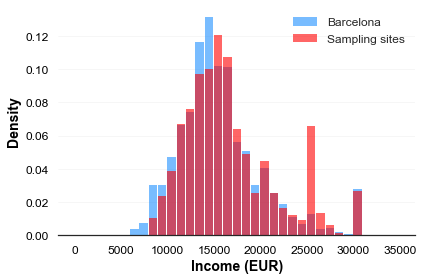

In [23]:
df_xAire_tmp = df_xAire[(df_xAire['tipus']=='tràfic') | (df_xAire['tipus']=='fons')]

plt.clf()
bcn_renta_plot = sns.distplot(df_income_bcn["Import_Euros"], color="red", label="Barcelona", bins=range(0,36000,1000), norm_hist=False, kde=False)
bcn_renta = [h.get_height() for h in bcn_renta_plot.patches]
bcn_renta_norm = helper.normalization([h.get_height() for h in bcn_renta_plot.patches])

plt.clf()
xaire_renta_plot = sns.distplot(df_xAire_tmp["renta"], color="dodgerblue", label="xAire", bins=range(0,36000,1000), norm_hist=False, kde=False)
xaire_renta = [h.get_height() for h in xaire_renta_plot.patches]
xaire_renta_norm = helper.normalization([h.get_height() for h in xaire_renta_plot.patches])

helper.plot_income([bcn_renta_norm, xaire_renta_norm])


#### Kolmogorov-Smirnov

In [24]:
helper.KS_test(df_xAire_tmp["renta"], df_income_bcn['Import_Euros'], alpha=0.05)

stats: 0.10839096434970445
p: 0.00011216511907363724
Reject Null hypothesis: the independent samples are not drawn from the same continuous distribution


$(b)$ Scatter plot between NO2 concentration levels and income average in each census tract (Pearson's r=0.21, p-value=3.93e-08).

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

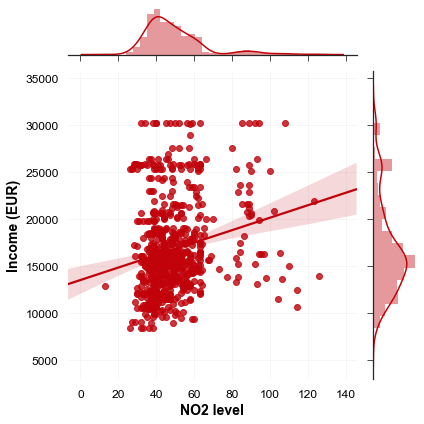

In [25]:
df_xAire_tmp = df_xAire[(df_xAire['tipus']=='tràfic') | (df_xAire['tipus']=='fons')]
helper.plot_income_corr(df_xAire_tmp)


#### Pearson

In [26]:
helper.Pearson_corr(df_xAire_tmp['no2_2017'], df_xAire_tmp['renta'])

stats: 0.2101079795568237
p: 3.932442511362329e-08
Reject Null hypothesis: there is a statistically significant correlation
